Machine Intelligence 2 - Exercise 2 - Principal Component Analysis

Group : Bramantyo Supriyatno, Julie Morgan, Poulami Ghosh

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import eig

import seaborn as sns
import scipy.io

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style="ticks", context="talk", palette="pastel")
plt.style.use('dark_background')

# Exercise 2.1

In [2]:
pca2 = np.loadtxt('pca2.csv', skiprows=1, delimiter=',').T

pca2_centered = pca2 - np.mean(pca2, axis=1).reshape((-1, 1))
pca2_cov = np.cov(pca2_centered)

pca2_eval, pca2_evec = eig(pca2_cov)

pca2_transformed = pca2_evec.T @ pca2_centered 

In [3]:
pca2_preprocessed = np.delete(pca2, [16, 156], axis=1)

pca2_centered = pca2_preprocessed - np.mean(pca2_preprocessed, axis=1).reshape((-1, 1))
pca2_cov = np.cov(pca2_centered)

pca2_eval_pre, pca2_evec_pre = eig(pca2_cov)

pca2_transformed_preprocessed = pca2_evec_pre.T @ pca2_centered 

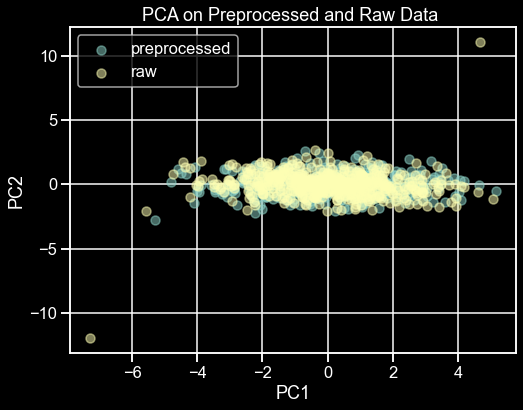

In [4]:
plt.figure(figsize = (8,6))
plt.scatter(pca2_transformed_preprocessed[0, :],pca2_transformed_preprocessed[1,:], alpha=0.5, label='preprocessed')
plt.scatter(pca2_transformed[0, :],pca2_transformed[1,:], alpha=0.5, label='raw')
plt.title('PCA on Preprocessed and Raw Data ')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

Discussion:

The 'outliers' significantly change the direction of the principal components because PCA tries to capture variance as much as possible. 

# Exercise 2.2 
(a)

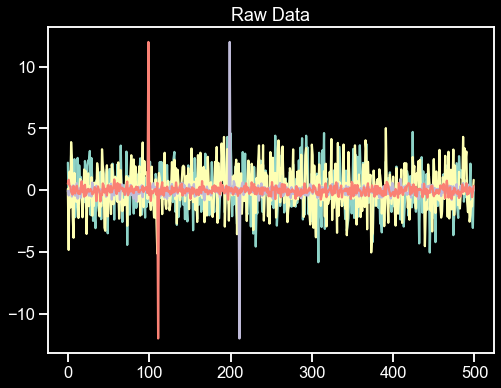

In [5]:
data = np.loadtxt('pca4.csv',skiprows=1, delimiter=',')
plt.figure(figsize = (8,6))

plt.plot(data)
plt.title("Raw Data")

plt.show()

In [6]:
a = np.where(data>6)[0]
b = np.where(data<-6)[0]
outliers = np.concatenate((a,b))

filtered = data.copy()
filtered = np.delete(filtered,(outliers),axis = 0)

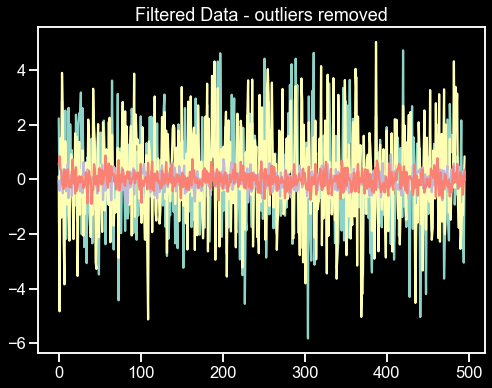

In [7]:
plt.figure(figsize = (8,6))

plt.plot(filtered)
plt.title("Filtered Data - outliers removed")
plt.show()

(b)

In [8]:
subset = filtered[:100,:] #increasing subset size to 200 makes no change to results, so kept at 100

In [9]:
scaler = StandardScaler(with_std = False)
scaler.fit(subset)

centred_data = scaler.transform(subset)

In [10]:
pca = PCA(n_components = 4)
pca.fit(subset)
pc = pca.transform(centred_data)

eigenvalues = pca.explained_variance_
eigenvalues

array([3.64560049, 2.00907825, 0.10776192, 0.09518386])

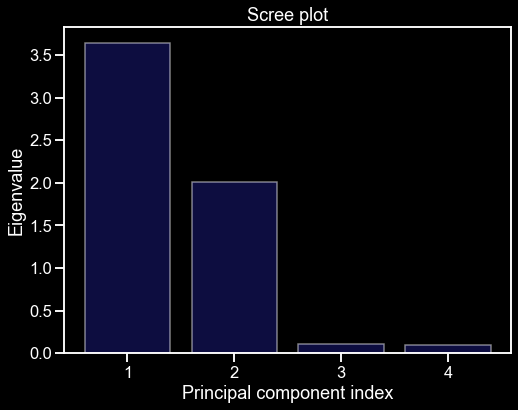

In [11]:
plt.figure(figsize = (8,6))
x = [1,2,3,4] 
plt.bar(x, eigenvalues, alpha=0.5, align='center', color = [0.1,0.1,0.5])
plt.ylabel('Eigenvalue')
plt.xlabel('Principal component index')
plt.xticks(np.arange(1, 5, 1))
plt.title("Scree plot")
plt.show()

__From the scree plot, it appears that the data is represented well by 2 principal components.__

(c)

In [12]:
covariance = np.cov(centred_data.T)
L,M = np.linalg.eig(covariance) #l = eigenvalues, M = eigenvectors
diag = np.diag(L)
sqrt_diag = np.sqrt(diag)
inv_sqrt_diag = np.linalg.inv(sqrt_diag)
a = M.T@centred_data.T
cov_a = np.cov(a)
v = inv_sqrt_diag@a
cov_v = np.cov(v)

(d)

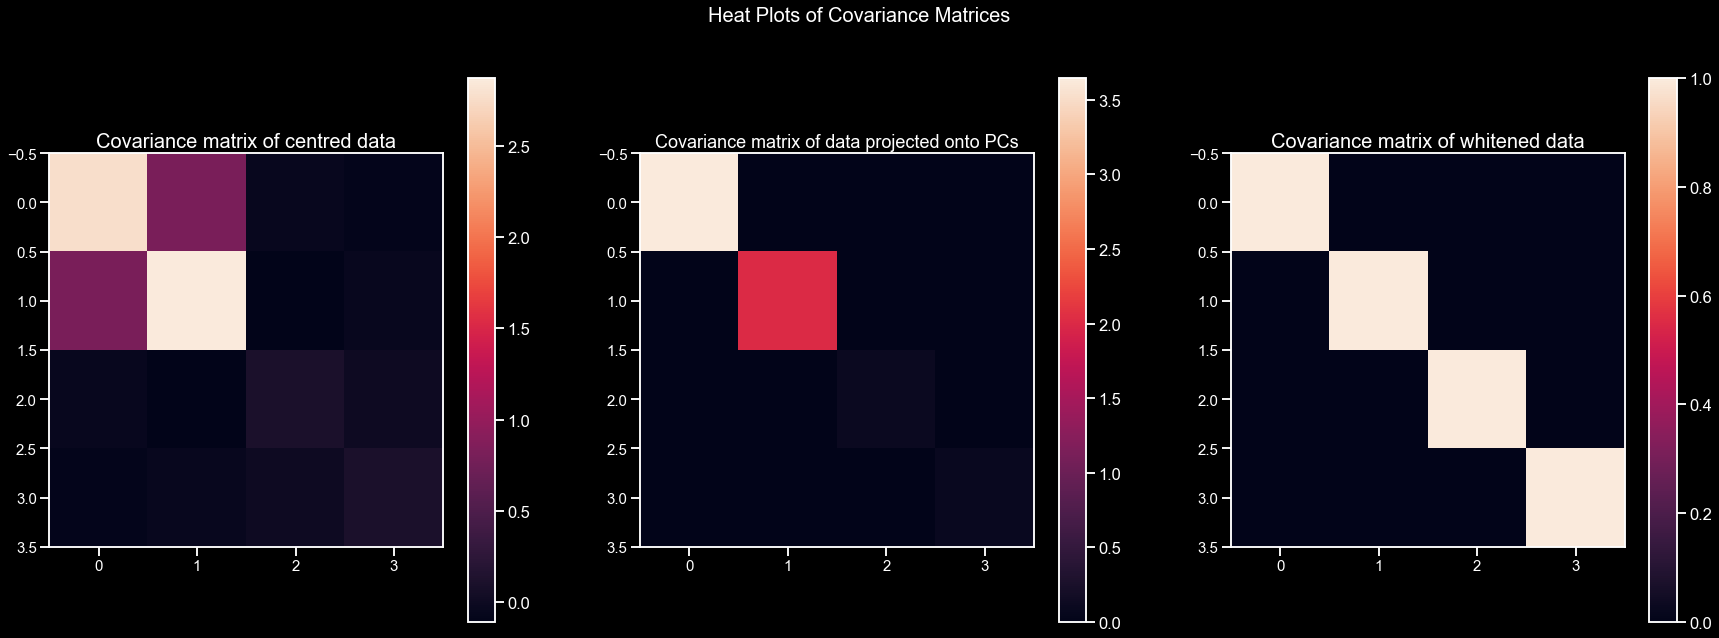

In [13]:
plt.figure(figsize = (30,10))

plt.subplot(131)
plt.imshow(covariance)
plt.colorbar()
plt.title("Covariance matrix of centred data", size = "20")
plt.xticks(size = "15")
plt.yticks(size = "15")

plt.subplot(132)
plt.imshow(cov_a)
plt.colorbar()
plt.title("Covariance matrix of data projected onto PCs", size = "18")
plt.xticks(size = "15")
plt.yticks(size = "15")


plt.subplot(133)
plt.imshow(cov_v)
plt.colorbar()
plt.title("Covariance matrix of whitened data", size = "20")
plt.xticks(size = "15")
plt.yticks(size = "15")


plt.suptitle("Heat Plots of Covariance Matrices",size = "20")
plt.show()

# Exercise 2.4

In [14]:
import matplotlib.cm as cm

In [15]:
def oja_rule_implementation(ini_w, epl, data):
    ws = []
    w = ini_w.copy()
    for i in range(len(data)):
        x = data[[i],:].T
        y = w.T @ x
        del_w = epl* y*(x -  y*w)
        w += del_w
        ws.append(w.copy())
    return np.array(ws).reshape(data.shape)

In [16]:
# data = pd.read_csv('data-onlinePCA.txt')
data = np.loadtxt('data-onlinePCA.txt', skiprows =1, delimiter=',', usecols=(1,2) )
t_max = 10
dt = t_max/len(data)
t = np.arange(0,t_max,dt)

In [17]:
epsilons = [0.002, 0.04, 0.45]

init_w = np.random.normal(size=(2,1))
init_w = init_w/np.linalg.norm(init_w)
ws = []
for eps in epsilons:
    ws.append(oja_rule_implementation(init_w, eps, data))

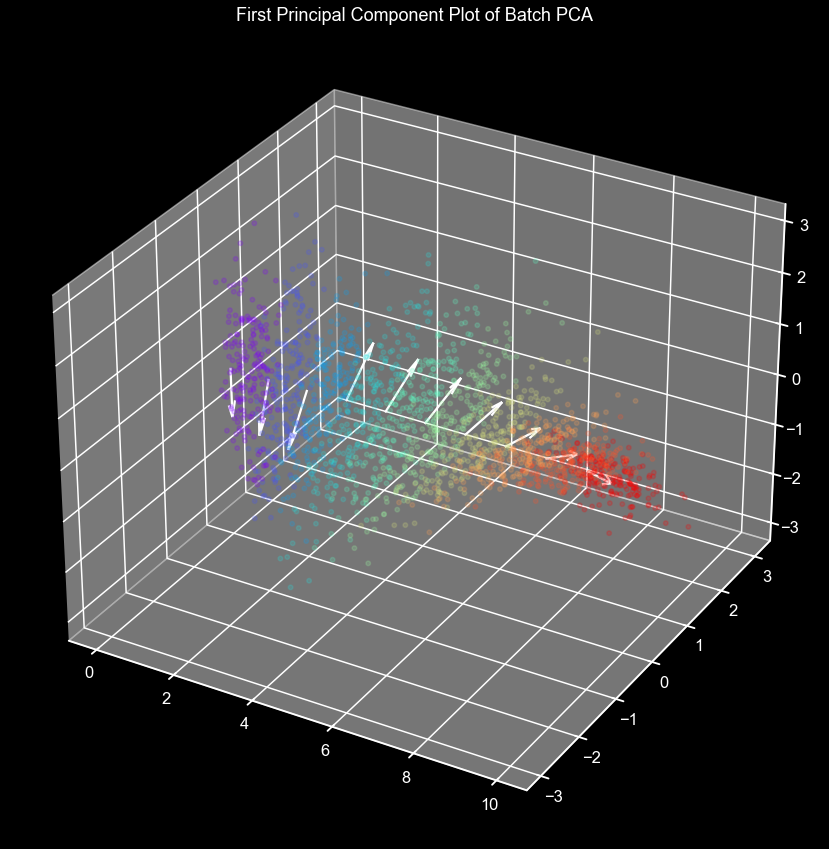

In [18]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
colors = cm.rainbow(np.linspace(0, 1, 10))

for i in range(10) :
    start = int(i/dt)
    end = int((i+1)/dt)
    data_block = data[start:end, :]
    ax.scatter(t[start:end], data[start:end,0], data[start:end,1], color=colors[i], alpha=0.2)
    centred_data_block= data_block - data_block.mean(axis=0)
    covariance = np.cov(centred_data_block.T)
    eigen_value, eigen_vector = np.linalg.eig(covariance)
    order = np.argsort(-1*eigen_value)
    
    eigen_vector_sorted = eigen_vector[:,order]
    
    ax.quiver(t[start+4],0, 0, 0, eigen_vector_sorted[0,0], eigen_vector_sorted[1,0], normalize = True)

# ax.plot(t, ws[0][:,0], ws[0][:,1], label= str(epsilons[0]))
# ax.plot(t, ws[1][:,0], ws[0][:,1], label= str(epsilons[1]))

# ax.plot(t, ws[2][:,0], ws[0][:,1], label= str(epsilons[2]))
# ax.legend(title = 'learning rate')
plt.title('First Principal Component Plot of Batch PCA')
plt.show()

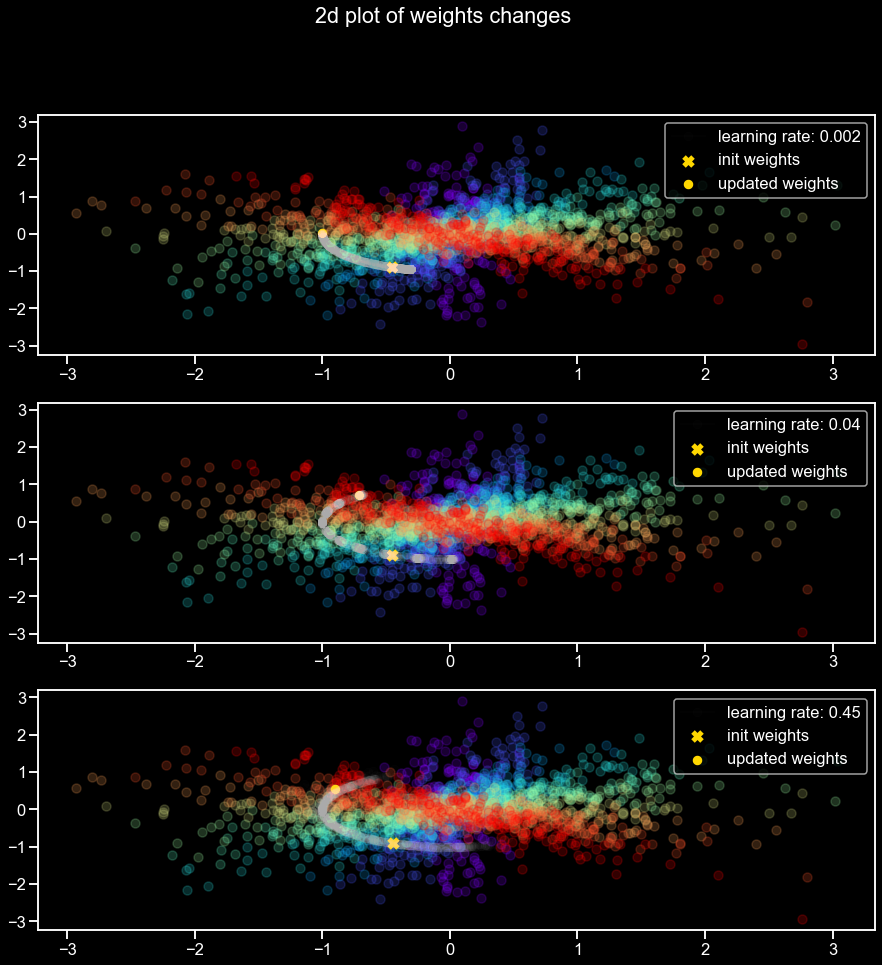

In [19]:
fig, ax = plt.subplots(3,1, figsize=(15,15))
fig.suptitle('2d plot of weights changes')
#ax = fig.add_subplot(311)
for i in range(10) :
    start = int(i/dt)
    end = int((i+1)/dt)
    data_block = data[start:end, :]
    ax[0].scatter(data[start:end,0], data[start:end,1], color=colors[i], alpha=0.2)
    ax[1].scatter(data[start:end,0], data[start:end,1], color=colors[i], alpha=0.2)
    ax[2].scatter(data[start:end,0], data[start:end,1], color=colors[i], alpha=0.2)

#alphas = np.linspace(0,1,data.shape[0])

for i in range(3):
    ax[i].plot(ws[i][:,0], ws[i][:,1], color='white', marker='o', label = 'learning rate: {}'.format(epsilons[i]), alpha=0.01)
    ax[i].scatter(ws[i][0,0],ws[i][0,1], color='gold', marker='x', linewidths=5, label='init weights')
    ax[i].scatter(ws[i][-1,0],ws[i][-1,1], color='gold', marker='.', linewidths=5,  label='updated weights')
    ax[i].legend()
    #ax[i].grid()

plt.show()

Oja's rule eventually tries to set the weight to data's first principal component. It seems that lower learning rate does not update the weights in a fluctuative manner, but it requires more time to find the optimum. on the other hand, faster learning rate tend to be more noisy.